In [464]:
# 1. Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [465]:
# loading dataframe
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.columns = [column.lower() for column in customer_df.columns]
customer_df.columns = customer_df.columns.str.replace(" ","_")
customer_df.head(5)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [466]:
# repeating some steps from previous labs

In [467]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [468]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [469]:
# dropping categorical columns
# checked 'correlation' in previous lab
customer_df = customer_df.drop(['customer','policy', 'vehicle_class','renew_offer_type',
                                 'education','marital_status','employmentstatus'],axis=1)

In [470]:
customer_df

,state,customer_lifetime_value,response,coverage,effective_to_date,gender,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,sales_channel,total_claim_amount,vehicle_size
0,Washington,2763.519279,No,Basic,2011-02-24,F,56274,Suburban,69,32,5,0,1,Corporate Auto,Agent,384.811147,Medsize
1,Arizona,6979.535903,No,Extended,2011-01-31,F,0,Suburban,94,13,42,0,8,Personal Auto,Agent,1131.464935,Medsize
2,Nevada,12887.431650,No,Premium,2011-02-19,F,48767,Suburban,108,18,38,0,2,Personal Auto,Agent,566.472247,Medsize
3,California,7645.861827,No,Basic,2011-01-20,M,0,Suburban,106,18,65,0,7,Corporate Auto,Call Center,529.881344,Medsize
4,Washington,2813.692575,No,Basic,2011-02-03,M,43836,Rural,73,12,44,0,1,Personal Auto,Agent,138.130879,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,2011-02-10,M,71941,Urban,73,18,89,0,2,Personal Auto,Web,198.234764,Medsize
9130,California,3096.511217,Yes,Extended,2011-02-12,F,21604,Suburban,79,14,28,0,1,Corporate Auto,Branch,379.200000,Medsize
9131,California,8163.890428,No,Extended,2011-02-06,M,0,Suburban,85,9,37,3,2,Corporate Auto,Branch,790.784983,Medsize
9132,California,7524.442436,No,Extended,2011-02-03,M,21941,Suburban,96,34,3,0,3,Personal Auto,Branch,691.200000,Large


In [471]:
# NaNs
customer_df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
effective_to_date                0
gender                           0
income                           0
location_code                    0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
sales_channel                    0
total_claim_amount               0
vehicle_size                     0
dtype: int64

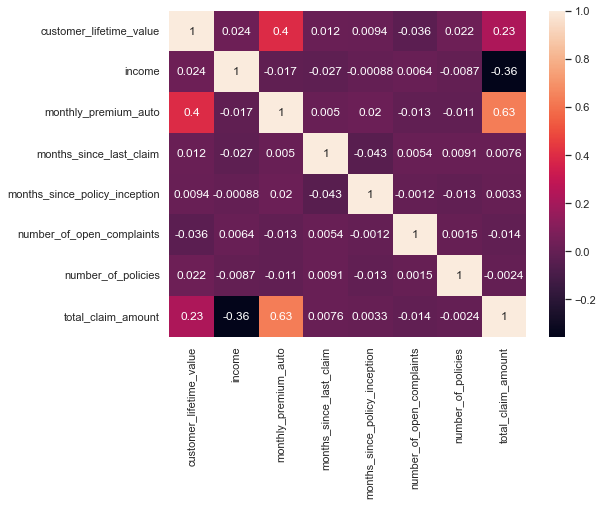

In [472]:
sns.heatmap(customer_df.corr(),annot=True)
sns.set(rc = {'figure.figsize':(8,6)})
plt.show()

In [473]:
# converting months_since_last_claim, months_since_policy_inception to object

In [474]:
customer_df.months_since_last_claim.value_counts().sort_values(ascending=True)

32    138
35    142
34    169
33    179
27    182
30    182
26    186
31    190
28    201
29    206
24    211
22    218
18    229
20    231
21    233
25    236
23    239
19    246
9     250
17    263
14    268
12    273
8     279
13    285
15    286
16    295
11    297
10    306
5     313
0     314
2     329
7     333
4     335
1     345
6     364
3     381
Name: months_since_last_claim, dtype: int64

In [475]:
def bin_month(x):
    if x <=12:
        return "low"
    elif x <= 24:
        return 'medium'
    else:
        return 'high'

In [476]:
customer_df.months_since_last_claim[customer_df.months_since_last_claim<=12]

4       12
6        0
7        0
12       9
15      12
        ..
9122     1
9123     8
9127     6
9131     9
9133     3
Name: months_since_last_claim, Length: 4119, dtype: int64

In [477]:
customer_df.months_since_last_claim = customer_df.months_since_last_claim.apply(bin_month)
customer_df.months_since_policy_inception = customer_df.months_since_policy_inception.apply(bin_month)

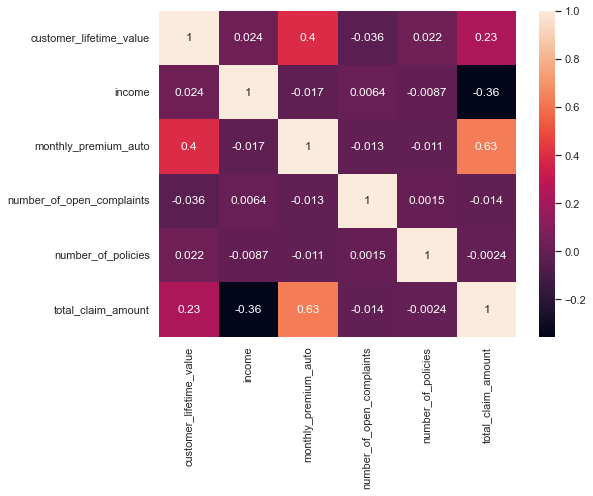

In [478]:
sns.heatmap(customer_df.corr(),annot=True)
sns.set(rc = {'figure.figsize':(8,6)})
plt.show()

In [479]:
# x - y - split

In [480]:
y = customer_df.customer_lifetime_value
X = customer_df.drop('customer_lifetime_value',axis=1)
X

,state,response,coverage,effective_to_date,gender,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,sales_channel,total_claim_amount,vehicle_size
0,Washington,No,Basic,2011-02-24,F,56274,Suburban,69,high,low,0,1,Corporate Auto,Agent,384.811147,Medsize
1,Arizona,No,Extended,2011-01-31,F,0,Suburban,94,medium,high,0,8,Personal Auto,Agent,1131.464935,Medsize
2,Nevada,No,Premium,2011-02-19,F,48767,Suburban,108,medium,high,0,2,Personal Auto,Agent,566.472247,Medsize
3,California,No,Basic,2011-01-20,M,0,Suburban,106,medium,high,0,7,Corporate Auto,Call Center,529.881344,Medsize
4,Washington,No,Basic,2011-02-03,M,43836,Rural,73,low,high,0,1,Personal Auto,Agent,138.130879,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,2011-02-10,M,71941,Urban,73,medium,high,0,2,Personal Auto,Web,198.234764,Medsize
9130,California,Yes,Extended,2011-02-12,F,21604,Suburban,79,medium,high,0,1,Corporate Auto,Branch,379.200000,Medsize
9131,California,No,Extended,2011-02-06,M,0,Suburban,85,low,high,3,2,Corporate Auto,Branch,790.784983,Medsize
9132,California,No,Extended,2011-02-03,M,21941,Suburban,96,high,low,0,3,Personal Auto,Branch,691.200000,Large


In [481]:
# train - test - split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1337)

In [482]:
# transforming nums

In [483]:
num_train = X_train.select_dtypes(np.number)
num_test = X_test.select_dtypes(np.number)
num_train.head()

,income,monthly_premium_auto,number_of_open_complaints,number_of_policies,total_claim_amount
6903,21827,67,0,8,321.600000
6860,46900,66,0,1,316.800000
7992,45776,89,0,2,95.950810
1527,72330,81,2,1,126.509441
8169,49182,70,0,2,165.410515


In [484]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(num_train)
num_train_minmax = transformer.transform(num_train)
num_test_minmax = transformer.transform(num_test)
pd.DataFrame(num_train_minmax).head()

,0,1,2,3,4
0,0.218355,0.025316,0.0,0.875,0.111038
1,0.469183,0.021097,0.0,0.000,0.109379
2,0.457939,0.118143,0.0,0.125,0.033036
3,0.723582,0.084388,0.4,0.000,0.043600
4,0.492012,0.037975,0.0,0.125,0.057047


In [485]:
# transforming cats
cat_train= X_train.select_dtypes(object)
cat_test= X_test.select_dtypes(object)
cat_train.head(2)

,state,response,coverage,gender,location_code,months_since_last_claim,months_since_policy_inception,policy_type,sales_channel,vehicle_size
6903,California,No,Basic,M,Suburban,medium,high,Special Auto,Branch,Medsize
6860,Arizona,Yes,Basic,M,Suburban,medium,high,Personal Auto,Web,Medsize


In [486]:
# splitting nominal, ordinal cats

In [487]:
# onehotencoding for nominals
cat_train_nom = cat_train[['response','state','gender','policy_type','sales_channel']]
cat_test_nom = cat_test[['response','state','gender','policy_type','sales_channel']]
cat_train_nom.head(2)

,response,state,gender,policy_type,sales_channel
6903,No,California,M,Special Auto,Branch
6860,Yes,Arizona,M,Personal Auto,Web


In [488]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='error', drop='first').fit(cat_train_nom) 
# handle_unknown='error' fuer unvorhergesehene kategorien
cat_train_ohe = ohe.transform(cat_train_nom).toarray()
cat_test_ohe = ohe.transform(cat_test_nom).toarray()
pd.DataFrame(cat_train_ohe).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [489]:
# ordinal encoding for ordinals
cat_test_ord = cat_test[['coverage','location_code','vehicle_size',
                         'months_since_policy_inception','months_since_last_claim']]
cat_train_ord = cat_train[['coverage','location_code','vehicle_size',
                         'months_since_policy_inception','months_since_last_claim']]
cat_test_ord.head(2)

,coverage,location_code,vehicle_size,months_since_policy_inception,months_since_last_claim
8262,Basic,Suburban,Medsize,high,low
3400,Basic,Suburban,Small,high,low


In [490]:
cat_test_ord.location_code.unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [491]:
cat_train_ord["coverage"] = cat_train_ord["coverage"].map({"Basic" : 0, "Extended" : .5, "Premium" : 1})
cat_train_ord["location_code"] = cat_train_ord["location_code"].map({"Rural" : 0, "Suburban" : .5, "Urban" : 1})
cat_train_ord["vehicle_size"] = cat_train_ord["vehicle_size"].map({"Small" : 0, "Medsize" : .5, "Large" : 1})
cat_train_ord["months_since_policy_inception"] = cat_train_ord["months_since_policy_inception"].map({"high" : 0, "medium" : .5, "low" : 1})
cat_train_ord["months_since_last_claim"] = cat_train_ord["months_since_last_claim"].map({"high" : 0, "medium" : .5, "low" : 1})

C:\Users\Martin\AppData\Local\Temp\ipykernel_14616\886571435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_train_ord["coverage"] = cat_train_ord["coverage"].map({"Basic" : 0, "Extended" : .5, "Premium" : 1})
C:\Users\Martin\AppData\Local\Temp\ipykernel_14616\886571435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_train_ord["location_code"] = cat_train_ord["location_code"].map({"Rural" : 0, "Suburban" : .5, "Urban" : 1})
C:\Users\Martin\AppData\Local\Temp\ipykernel_14616\886571435.py:3: S

In [492]:
cat_test_ord["coverage"] = cat_test_ord["coverage"].map({"Basic" : 0, "Extended" : .5, "Premium" : 1})
cat_test_ord["location_code"] = cat_test_ord["location_code"].map({"Rural" : 0, "Suburban" : .5, "Urban" : 1})
cat_test_ord["vehicle_size"] = cat_test_ord["vehicle_size"].map({"Small" : 0, "Medsize" : .5, "Large" : 1})
cat_test_ord["months_since_policy_inception"] = cat_test_ord["months_since_policy_inception"].map({"high" : 0, "medium" : .5, "low" : 1})
cat_test_ord["months_since_last_claim"] = cat_test_ord["months_since_last_claim"].map({"high" : 0, "medium" : .5, "low" : 1})

C:\Users\Martin\AppData\Local\Temp\ipykernel_14616\3579194783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_test_ord["coverage"] = cat_test_ord["coverage"].map({"Basic" : 0, "Extended" : .5, "Premium" : 1})
C:\Users\Martin\AppData\Local\Temp\ipykernel_14616\3579194783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_test_ord["location_code"] = cat_test_ord["location_code"].map({"Rural" : 0, "Suburban" : .5, "Urban" : 1})
C:\Users\Martin\AppData\Local\Temp\ipykernel_14616\3579194783.py:3: Se

In [493]:
cat_train_ord.head()

,coverage,location_code,vehicle_size,months_since_policy_inception,months_since_last_claim
6903,0.0,0.5,0.5,0.0,0.5
6860,0.0,0.5,0.5,0.0,0.5
7992,0.5,0.0,0.5,0.5,1.0
1527,0.5,0.0,0.0,0.0,1.0
8169,0.0,0.0,0.5,0.0,1.0


In [494]:
# concatinating cats

In [495]:
cat_train = np.concatenate((cat_train_ohe,cat_train_ord),axis=1)
cat_test = np.concatenate((cat_test_ohe,cat_test_ord),axis=1)
pd.DataFrame(cat_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.5,0.5,0.0,0.5
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.5,0.5,0.0,0.5
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.5,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,0.0,0.0,1.0
6389,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.5,0.0,1.0
6390,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5,0.5,0.5,0.0,1.0
6391,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.5,0.5,0.0,0.5


In [496]:
# concatinating cats and nunm

In [497]:
X_train = np.concatenate((num_train_minmax,cat_train),axis=1)
X_test = np.concatenate((num_test_minmax,cat_test),axis=1)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.218355,0.025316,0.0,0.875,0.111038,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.5,0.5,0.0,0.5
1,0.469183,0.021097,0.0,0.000,0.109379,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.5,0.5,0.0,0.5
2,0.457939,0.118143,0.0,0.125,0.033036,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.5,1.0
3,0.723582,0.084388,0.4,0.000,0.043600,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,1.0
4,0.492012,0.037975,0.0,0.125,0.057047,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,0.210782,0.565401,0.0,0.125,0.485201,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.5,0.0,0.0,1.0
6389,0.988225,0.265823,0.2,0.000,0.053591,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.5,0.0,1.0
6390,0.000000,0.329114,0.0,0.125,0.230505,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.5,0.5,0.5,0.0,1.0
6391,0.196907,0.236287,0.2,1.000,0.194001,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.5,0.5,0.0,0.5


In [498]:
# testing linear regression model
from sklearn import linear_model # linear_model.
from sklearn.metrics import r2_score

lm = LinearRegression()
lm.fit(X_train,y_train)

pred_test = lm.predict(X_test)
r2_score(y_test,pred_test )


0.15774663613107287

In [499]:
lm.score(X_test,y_test)

0.15774663613107287

In [500]:
# testing other models, gibt noch mehr
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# decisiontreeregressor, sgdregressor, randomregressor

In [501]:
def model(xtr,ytr,xte,yte):
    lm = LinearRegression()
    lm.fit(xtr, ytr)
    metric1 = lm.score(xte,yte)
    
    KNN = KNeighborsRegressor(n_neighbors=3)
    KNN.fit(xtr, ytr)
    metric2 = KNN.score(xte,yte)
    
    MLP = MLPRegressor(random_state=1, max_iter=500)
    MLP.fit(xtr, ytr)
    metric3 = MLP.score(xte, yte)
    
    return metric1,metric2,metric3

In [502]:
regr, KNN, MLP = model(X_train,y_train,X_test,y_test)
print('linear regression score: ',regr)
print('KNN score: ',KNN)
print('MLP score: ',MLP)


linear regression score:  0.15774663613107287
KNN score:  -0.19062044937025768
MLP score:  0.1238130541189647


C:\Users\Martin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# loesung fuer eine fkt., muss ich noch ausbessern
def models auto(models,xtrain,ytrain,xtest,ytest):
    for model in models:
        model.fit(xtrain,ytrain)
        print(model.score(xrtain))
        print(model.score(xtest))
        
models = alle modelle
models auto(models,xtrain,ytest,xtest,ytest)

In [503]:
# same scores from the function

In [504]:
# KNN = KNeighborsRegressor(n_neighbors=3)
# KNN.fit(X_train, y_train)
# score = KNN.score(X_test, y_test) 
# score

In [505]:
# lm = LinearRegression()
# lm.fit(X_train, y_train)
# lm.score(X_test, y_test)

In [506]:
# MLP = MLPRegressor(random_state=1, max_iter=500)
# MLP.fit(X_train, y_train)
# MLP.score(X_test, y_test)

In [507]:
# linear regression model is the best
# overall all models are bad
# possible reasons: bad data, bad cleaning, wrong encoding

In [511]:
!git push

To https://github.com/DrMrtn/lab-comparing-regression-models
   d4690e8..576e94f  master -> master
